In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\dell\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dell\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dell\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dell\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
train_path = "cats-and-dogs/train"
valid_path = "cats-and-dogs/valid"
test_path = "cats-and-dogs/test"

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=["dog", "cat"], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=["dog", "cat"], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=["dog", "cat"], batch_size=10)

Found 800 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
# plot images with labels
def plots(ims, figsize=(20,10), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


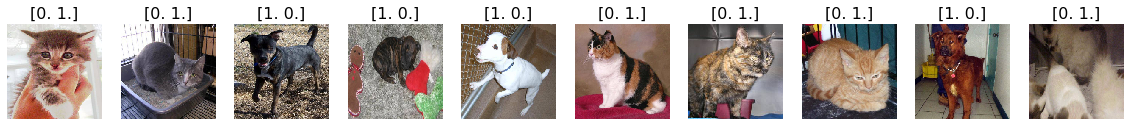

In [6]:
plots(imgs, titles=labels)

# Build and train CNN

In [7]:
model = Sequential([
            Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
            Flatten(),
            Dense(2, activation="softmax"),
        ])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
model.fit_generator(train_batches, steps_per_epoch=10, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 45s - loss: 9.5097 - acc: 0.4100 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 6s - loss: 6.6084 - acc: 0.5900 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 6s - loss: 9.1873 - acc: 0.4300 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 6s - loss: 8.2202 - acc: 0.4900 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 6s - loss: 7.8979 - acc: 0.5100 - val_loss: 8.0590 - val_acc: 0.5000


# Predict

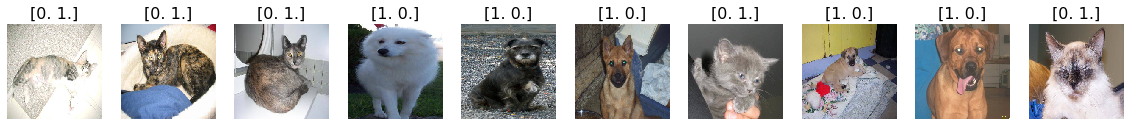

In [10]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [11]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 1., 1., 1., 0., 1., 1., 0.], dtype=float32)

In [12]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [13]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [14]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
     This is the function that will plot confusion matrix.
     Normalization can be applied by setting normalize=True.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalize Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
        
    print(cm)
    
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion Matrix Without Normalization
[[5 0]
 [5 0]]


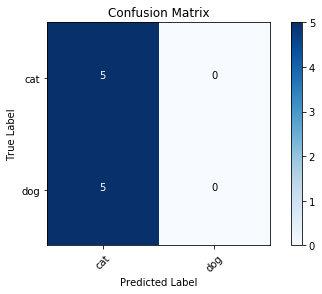

In [16]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")

# Build Fine-tuned VGG16 model

In [17]:
vgg16_model = keras.applications.vgg16.VGG16()

In [18]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
type(vgg16_model)

keras.engine.training.Model

In [20]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
for layer in model.layers:
    layer.trainable = False

In [23]:
model.add(Dense(2, activation="softmax"))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Train the fine-tuned VGG16 Model

In [25]:
model.compile(Adam(lr=.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [26]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=20, verbose=2)

Epoch 1/20
 - 135s - loss: 1.6683 - acc: 0.3750 - val_loss: 1.5316 - val_acc: 0.5000
Epoch 2/20
 - 59s - loss: 1.3388 - acc: 0.6000 - val_loss: 1.2327 - val_acc: 0.5625
Epoch 3/20
 - 250s - loss: 0.9957 - acc: 0.6250 - val_loss: 1.0150 - val_acc: 0.6250
Epoch 4/20
 - 136s - loss: 0.6403 - acc: 0.7750 - val_loss: 0.8175 - val_acc: 0.6250
Epoch 5/20
 - 131s - loss: 0.4394 - acc: 0.8500 - val_loss: 0.6532 - val_acc: 0.6250
Epoch 6/20
 - 51s - loss: 0.7751 - acc: 0.6500 - val_loss: 0.5271 - val_acc: 0.6250
Epoch 7/20
 - 36s - loss: 0.5469 - acc: 0.7750 - val_loss: 0.4343 - val_acc: 0.8125
Epoch 8/20
 - 36s - loss: 0.5390 - acc: 0.7000 - val_loss: 0.3743 - val_acc: 0.7500
Epoch 9/20
 - 37s - loss: 0.5007 - acc: 0.8000 - val_loss: 0.3289 - val_acc: 0.8125
Epoch 10/20
 - 37s - loss: 0.3433 - acc: 0.8000 - val_loss: 0.2825 - val_acc: 0.8125
Epoch 11/20
 - 36s - loss: 0.3794 - acc: 0.8500 - val_loss: 0.2293 - val_acc: 0.9375
Epoch 12/20
 - 38s - loss: 0.3620 - acc: 0.9000 - val_loss: 0.1907 - v

# Predict using Fine-tuned VGG16 Model

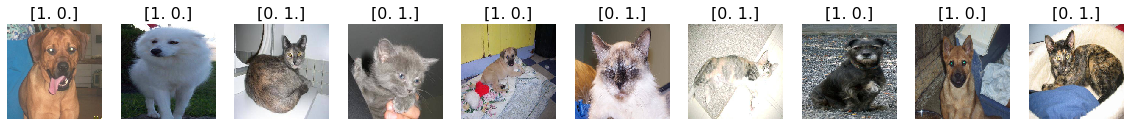

In [27]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [28]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 0., 1., 0., 0., 1., 1., 0.], dtype=float32)

In [29]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [30]:
predictions

array([[9.8428798e-01, 1.5712002e-02],
       [8.0408788e-01, 1.9591212e-01],
       [1.3420242e-04, 9.9986577e-01],
       [1.9619751e-03, 9.9803799e-01],
       [9.7466713e-01, 2.5332885e-02],
       [1.3572368e-04, 9.9986422e-01],
       [3.4909226e-02, 9.6509081e-01],
       [8.5499847e-01, 1.4500155e-01],
       [9.9441022e-01, 5.5898032e-03],
       [1.8621571e-03, 9.9813783e-01]], dtype=float32)

In [31]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion Matrix Without Normalization
[[5 0]
 [0 5]]


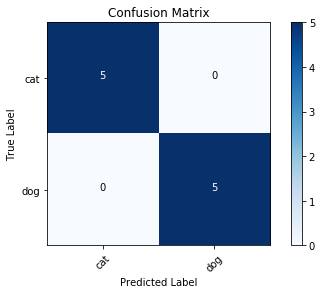

In [32]:
cm_plots_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plots_labels, title="Confusion Matrix")

In [33]:
model.save('VGG16_cats_and_dogs.h5')